In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and prepare MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model (use a subset for speed)
history = model.fit(
    x_train[:5000], y_train_cat[:5000],
    epochs=3,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5548 - loss: 1.4428 - val_accuracy: 0.9040 - val_loss: 0.3314
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9258 - loss: 0.2594 - val_accuracy: 0.9340 - val_loss: 0.2283
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9555 - loss: 0.1523 - val_accuracy: 0.9390 - val_loss: 0.1833
Test accuracy: 0.9532


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


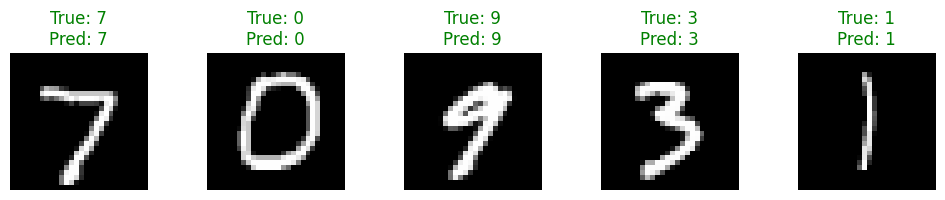

In [ ]:
# Function to show images with predictions
def show_predictions(images, true_labels, predictions=None):
    if predictions is None:
        predictions = model.predict(images)

    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')

        pred_label = np.argmax(predictions[i])
        actual_label = true_labels[i]

        color = 'green' if pred_label == actual_label else 'red'
        plt.title(f"True: {actual_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select 5 test images and show predictions
test_indices = [0, 10, 20, 30, 40]
test_sample = x_test[test_indices]
test_sample_labels = y_test[test_indices]

# Get and show predictions
show_predictions(test_sample, test_sample_labels)

In [ ]:
def create_adversarial_example(image, true_label, epsilon=0.1):
    """
    Generate an adversarial example using FGSM

    Parameters:
        image: Input image (shape: [1, 28, 28, 1])
        true_label: True label (integer)
        epsilon: Perturbation magnitude

    Returns:
        Adversarial image
    """
    # Convert to tensor and ensure we can take gradients with respect to it
    image_tensor = tf.convert_to_tensor(image)
    true_label_tensor = tf.convert_to_tensor([true_label])

    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        # Get model prediction
        prediction = model(image_tensor)
        # Calculate loss
        loss = tf.keras.losses.sparse_categorical_crossentropy(true_label_tensor, prediction)

    # Get the gradients
    gradient = tape.gradient(loss, image_tensor)

    # Create perturbation using the sign of gradients
    perturbation = epsilon * tf.sign(gradient)

    # Add perturbation to create adversarial example
    adversarial_image = image_tensor + perturbation

    # Ensure pixel values stay between 0 and 1
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)

    return adversarial_image.numpy()


Example 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


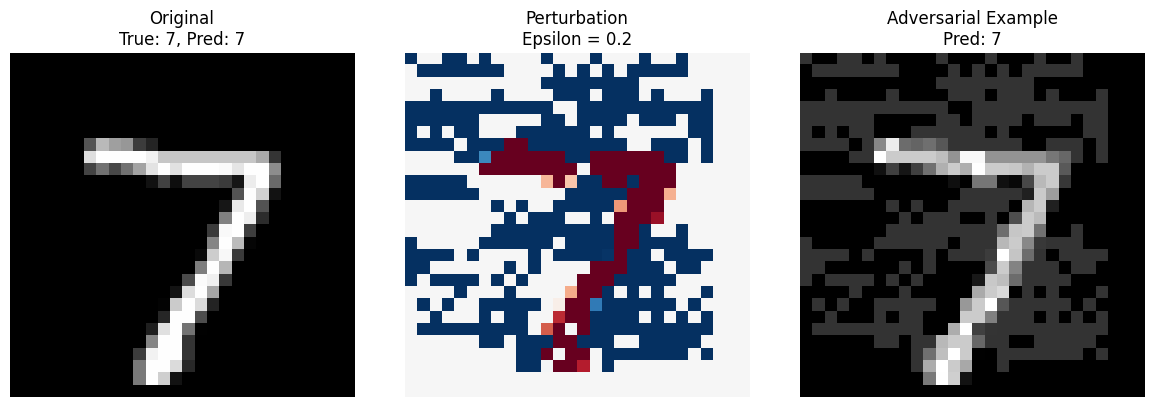

Original image - Top prediction: 7 with 0.9986 confidence
Adversarial image - Top prediction: 7 with 0.6405 confidence
✗ Attack failed. Model still predicted the correct class.

Example 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


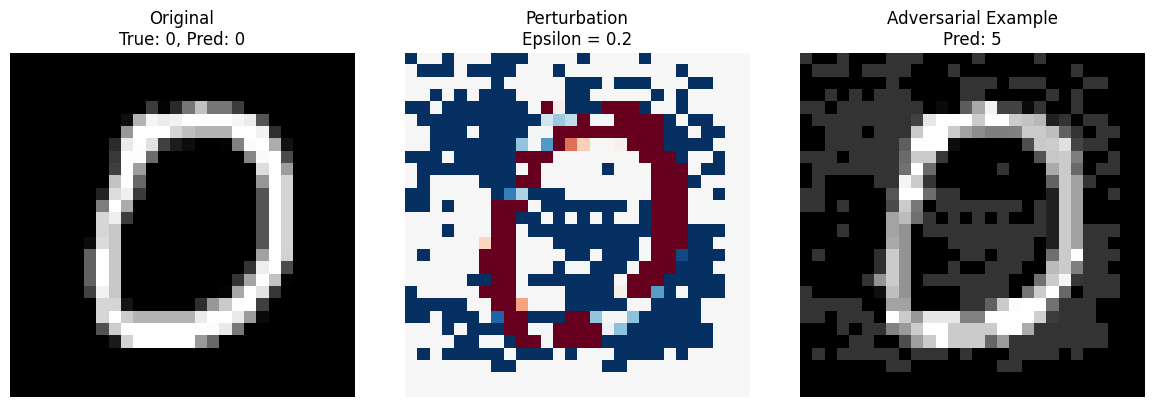

Original image - Top prediction: 0 with 0.9987 confidence
Adversarial image - Top prediction: 5 with 0.4569 confidence
✓ Attack successful! Model was fooled.

Example 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


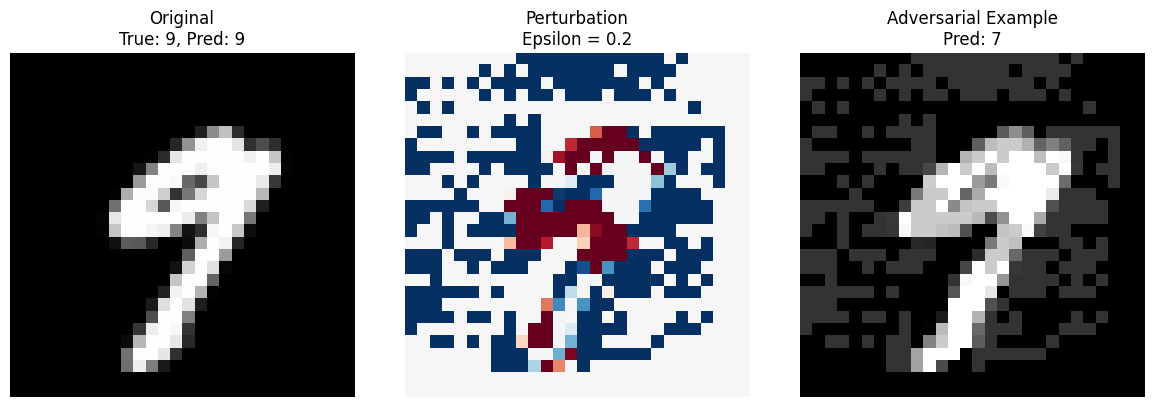

Original image - Top prediction: 9 with 0.9471 confidence
Adversarial image - Top prediction: 7 with 0.8630 confidence
✓ Attack successful! Model was fooled.


In [ ]:
def show_adversarial_comparison(image, true_label, epsilon=0.1):
    """
    Show original image, perturbation, and adversarial example side by side
    """
    # Reshape image for model
    image_reshaped = image.reshape(1, 28, 28, 1)

    # Get original prediction
    original_pred = model.predict(image_reshaped)[0]
    original_pred_label = np.argmax(original_pred)

    # Create adversarial example
    adv_example = create_adversarial_example(image_reshaped, true_label, epsilon)

    # Get adversarial prediction
    adv_pred = model.predict(adv_example)[0]
    adv_pred_label = np.argmax(adv_pred)

    # Calculate perturbation (difference)
    perturbation = adv_example - image_reshaped

    # Display images
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Original\nTrue: {true_label}, Pred: {original_pred_label}")
    plt.axis('off')

    # Perturbation (scaled for visibility)
    plt.subplot(1, 3, 2)
    plt.imshow(perturbation.reshape(28, 28), cmap='RdBu', vmin=-epsilon, vmax=epsilon)
    plt.title(f"Perturbation\nEpsilon = {epsilon}")
    plt.axis('off')

    # Adversarial example
    plt.subplot(1, 3, 3)
    plt.imshow(adv_example.reshape(28, 28), cmap='gray')
    plt.title(f"Adversarial Example\nPred: {adv_pred_label}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print prediction details
    print(f"Original image - Top prediction: {original_pred_label} with {original_pred[original_pred_label]:.4f} confidence")
    print(f"Adversarial image - Top prediction: {adv_pred_label} with {adv_pred[adv_pred_label]:.4f} confidence")

    if original_pred_label != adv_pred_label:
        print("✓ Attack successful! Model was fooled.")
    else:
        print("✗ Attack failed. Model still predicted the correct class.")

# Try with different examples
for i, idx in enumerate(test_indices[:3]):  # Test first 3 samples
    print(f"\nExample {i+1}:")
    show_adversarial_comparison(x_test[idx], y_test[idx], epsilon=0.2)

In [ ]:
def test_epsilon_values(image, true_label):
    """Test different epsilon values on the same image"""
    epsilons = [0.05, 0.1, 0.15, 0.2, 0.25]

    for epsilon in epsilons:
        print(f"\nTesting with epsilon = {epsilon}:")
        show_adversarial_comparison(image, true_label, epsilon)

# Choose one test image to experiment with
test_image = x_test[10]
test_label = y_test[10]

test_epsilon_values(test_image, test_label)